In [2]:
#Import the libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#read the file
df=pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7935 entries, 0 to 7934
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(212), int64(2), object(12)
memory usage: 13.7+ MB


# Let's find the high value Customer

In [5]:
#av_rech_amt_data_x and total_rech_data_x
#x -6,7,8,9
# These coloumns are available in the dataset
df['total_rech_data_amt_6'] = df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_data_amt_7'] = df['av_rech_amt_data_7'] * df['total_rech_data_7']
df['total_rech_data_amt_8'] = df['av_rech_amt_data_8'] * df['total_rech_data_8']
df['total_rech_data_amt_9'] = df['av_rech_amt_data_9'] * df['total_rech_data_9']
#Average 

In [6]:
#average recharge done in the first two months(june & july)
df_av_rech_6n7 = (df['total_rech_amt_6'].fillna(0) 
+ df['total_rech_amt_7'].fillna(0) 
+ df['total_rech_data_amt_6'].fillna(0) 
+ df['total_rech_data_amt_7'].fillna(0))/2

In [7]:
#70 % of the calculated average amount
percentile_70_6n7 = np.percentile(df_av_rech_6n7, 70.0)
print("70 percentile is : ", percentile_70_6n7)

70 percentile is :  487.39999999999964


In [8]:
#fitler the dataset based on 70th percentile
df_high_value_cust = df[df_av_rech_6n7 >= percentile_70_6n7]
print("Dimensions of the filtered dataset:",df_high_value_cust.shape)

Dimensions of the filtered dataset: (2381, 230)


In [9]:
df_high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,

In [10]:
# calculate churn/non-churn based on the usage as mentioned in the problem statement
df_high_value_cust['churn'] = np.where(df_high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
df_high_value_cust.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.

In [11]:
#find out churn/non churn per
df_high_value_cust['churn'].value_counts()/len(df_high_value_cust)*100
# Classes are imbalance

0    91.264175
1     8.735825
Name: churn, dtype: float64

#  Data Preprocessing

In [12]:
# lets check the columns with no variance in their values and drop such columns
for i in df_high_value_cust.columns:
    if df_high_value_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", df_high_value_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        df_high_value_cust.drop(i,axis=1,inplace = True)

print("\nDimension of the updated dataset:",df_high_value_cust.shape)
# we have dropped the uncessary columns 


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column last_date_of_month_9 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_9

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_m

In [13]:
# check the null values
(df_high_value_cust.isnull().sum() * 100 / len(df_high_value_cust)).sort_values(ascending = False)

total_rech_data_9           48.005040
fb_user_9                   48.005040
date_of_last_rech_data_9    48.005040
max_rech_data_9             48.005040
count_rech_2g_9             48.005040
count_rech_3g_9             48.005040
av_rech_amt_data_9          48.005040
arpu_3g_9                   48.005040
arpu_2g_9                   48.005040
night_pck_user_9            48.005040
total_rech_data_amt_9       48.005040
fb_user_8                   44.477110
date_of_last_rech_data_8    44.477110
count_rech_3g_8             44.477110
count_rech_2g_8             44.477110
arpu_3g_8                   44.477110
arpu_2g_8                   44.477110
av_rech_amt_data_8          44.477110
max_rech_data_8             44.477110
total_rech_data_8           44.477110
total_rech_data_amt_8       44.477110
night_pck_user_8            44.477110
total_rech_data_6           43.259135
av_rech_amt_data_6          43.259135
max_rech_data_6             43.259135
fb_user_6                   43.259135
count_rech_3

In [14]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = df_high_value_cust.columns
df_null_perc = df_high_value_cust.isnull().sum() * 100 / len(df_high_value_cust)
df_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_null_perc})

drop_cols = df_null_df.loc[(df_null_df["col_name"].str.contains('_9')==False) & (df_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
df_high_value_cust.drop(drop_cols, axis=1,inplace = True)
df_high_value_cust.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
total_rech_data_6                  total_rech_data_6
total_rech_data_7                  total_rech_data_7
total_rech_data_8                  total_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
av_rech_amt_data_6                av_rech_amt_data_6
av_rech_amt_data_7                av_rech_amt_data_7
av_rech_amt_data_8                av_rech_amt_data_8
arpu_3g_6            

(2381, 182)

In [15]:
# lets check for columns that can be changed to integers, floats or date types
object_col_data = df_high_value_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [16]:
#convert to datetime
for col in object_col_data.columns:
    df_high_value_cust[col] = pd.to_datetime(df_high_value_cust[col])
df_high_value_cust.shape

(2381, 182)

In [17]:
# lets drop the highly correlated ones
cor = df_high_value_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

std_ic_mou_9           std_ic_t2t_mou_8      0.600759
std_ic_mou_7           std_ic_t2t_mou_6      0.601141
std_ic_t2t_mou_8       std_ic_t2t_mou_7      0.602101
total_rech_num_8       total_rech_num_6      0.602107
std_og_mou_8           std_og_t2t_mou_7      0.602192
sachet_3g_8            sachet_3g_6           0.602318
arpu_2g_9              max_rech_data_9       0.602413
total_og_mou_9         std_og_mou_8          0.602736
loc_ic_mou_9           loc_ic_t2m_mou_6      0.603175
total_og_mou_8         std_og_t2t_mou_8      0.603625
total_ic_mou_9         loc_ic_t2t_mou_8      0.604550
loc_og_t2t_mou_9       onnet_mou_9           0.604717
total_ic_mou_8         loc_ic_t2t_mou_8      0.604917
loc_og_mou_8           loc_og_t2m_mou_7      0.605390
total_ic_mou_7         loc_ic_t2m_mou_9      0.606367
std_og_mou_8           onnet_mou_8           0.606639
total_og_mou_8         total_og_mou_6        0.606825
total_og_mou_9         total_og_mou_7        0.607444
loc_og_mou_6           loc_o

In [18]:
# we will drop the columns with high correlation (+/- 60%)
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df_high_value_cust.drop(drop_col_list, axis=1, inplace=True)
df_high_value_cust.shape

(2381, 127)

In [19]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 3 months
cols_to_drop = [col for col in df_high_value_cust.columns if '_9' in col]
print(cols_to_drop)

df_high_value_cust.drop(cols_to_drop, axis=1, inplace=True)

df_high_value_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(2381, 88)

In [20]:
#lets check the dataset again for null values
(df_high_value_cust.isnull().sum() * 100 / len(df_high_value_cust)).sort_values(ascending = False)
# Obervation : we are left with few columns with around 4% of null values

std_og_mou_8          3.527929
roam_ic_mou_8         3.527929
spl_ic_mou_8          3.527929
std_ic_t2f_mou_8      3.527929
isd_ic_mou_8          3.527929
ic_others_8           3.527929
isd_og_mou_8          3.527929
std_ic_t2t_mou_8      3.527929
std_og_t2f_mou_8      3.527929
loc_og_mou_8          3.527929
loc_og_t2c_mou_8      3.527929
loc_ic_mou_8          3.527929
roam_og_mou_8         3.527929
std_ic_mou_8          3.527929
spl_og_mou_8          3.527929
offnet_mou_8          3.527929
og_others_8           3.527929
onnet_mou_8           3.527929
loc_ic_mou_7          1.637967
onnet_mou_7           1.637967
spl_ic_mou_7          1.637967
spl_og_mou_7          1.637967
isd_ic_mou_7          1.637967
std_ic_t2f_mou_7      1.637967
ic_others_7           1.637967
og_others_7           1.637967
isd_og_mou_7          1.637967
std_og_mou_7          1.637967
roam_og_mou_7         1.637967
std_og_t2f_mou_7      1.637967
std_ic_t2t_mou_7      1.637967
offnet_mou_7          1.637967
loc_og_m

In [21]:
# drop rows with null values
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['onnet_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['onnet_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['onnet_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['offnet_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['offnet_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['offnet_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_ic_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_ic_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_ic_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_og_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_og_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['roam_og_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_t2c_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_t2c_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_t2c_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_og_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_t2f_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_t2f_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_t2f_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_og_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_og_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_og_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_og_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_og_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_og_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_og_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['og_others_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['og_others_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['og_others_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_ic_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_ic_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['loc_ic_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2t_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2t_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2t_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2f_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2f_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_t2f_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['std_ic_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_ic_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_ic_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['spl_ic_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_ic_mou_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_ic_mou_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['isd_ic_mou_8'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['ic_others_6'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['ic_others_7'])]
df_high_value_cust = df_high_value_cust[~np.isnan(df_high_value_cust['ic_others_8'])]

In [22]:
#lets check the dataset again for null values
print(df_high_value_cust.shape)
(df_high_value_cust.isnull().sum() * 100 / len(df_high_value_cust)).sort_values(ascending = False)


(2268, 88)


churn                 0.0
sep_vbc_3g            0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_8      0.0
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_6          0.0
spl_og_mou_7          0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
loc_ic_mou_6          0.0
loc_ic_mou_7          0.0
loc_ic_mou_8          0.0
std_ic_t2t_mou_6      0.0
std_ic_t2t_mou_7      0.0
std_og_t2f_mou_6      0.0
loc_og_mou_8          0.0
loc_og_mou_7          0.0
offnet_mou_8          0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
roam_ic_mou_6         0.0
loc_og_mou_6          0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_

In [23]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [24]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [25]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

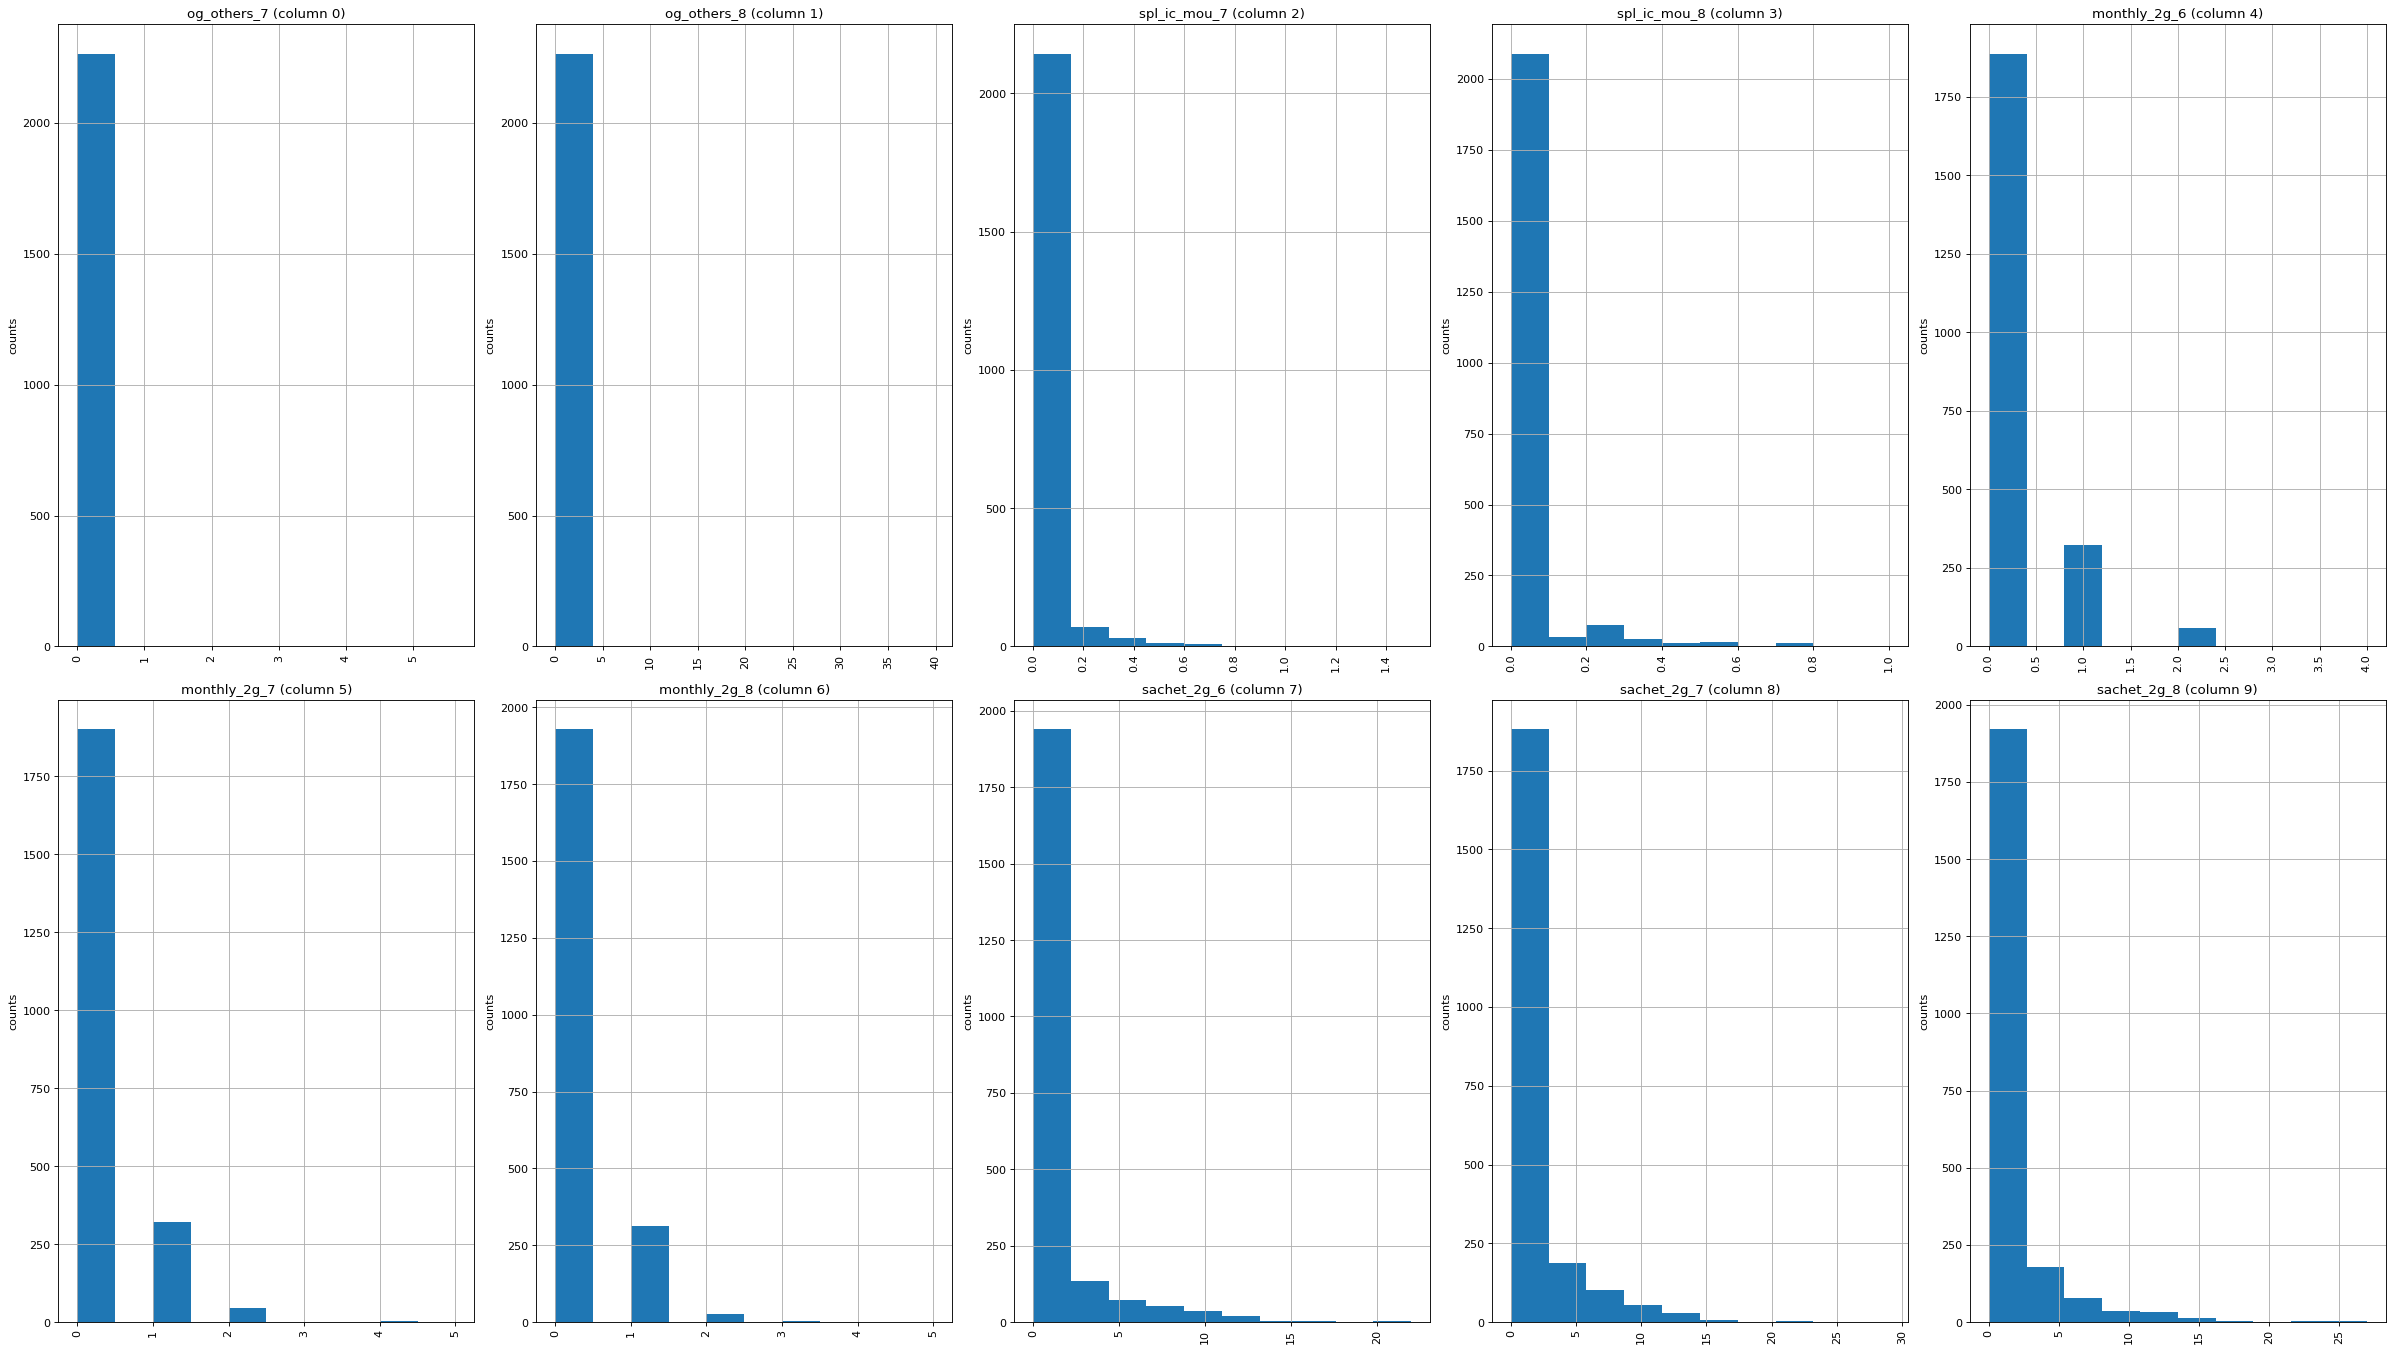

In [26]:
# call the function to plot the graphs
plotPerColumnDistribution(df_high_value_cust, 10, 5)

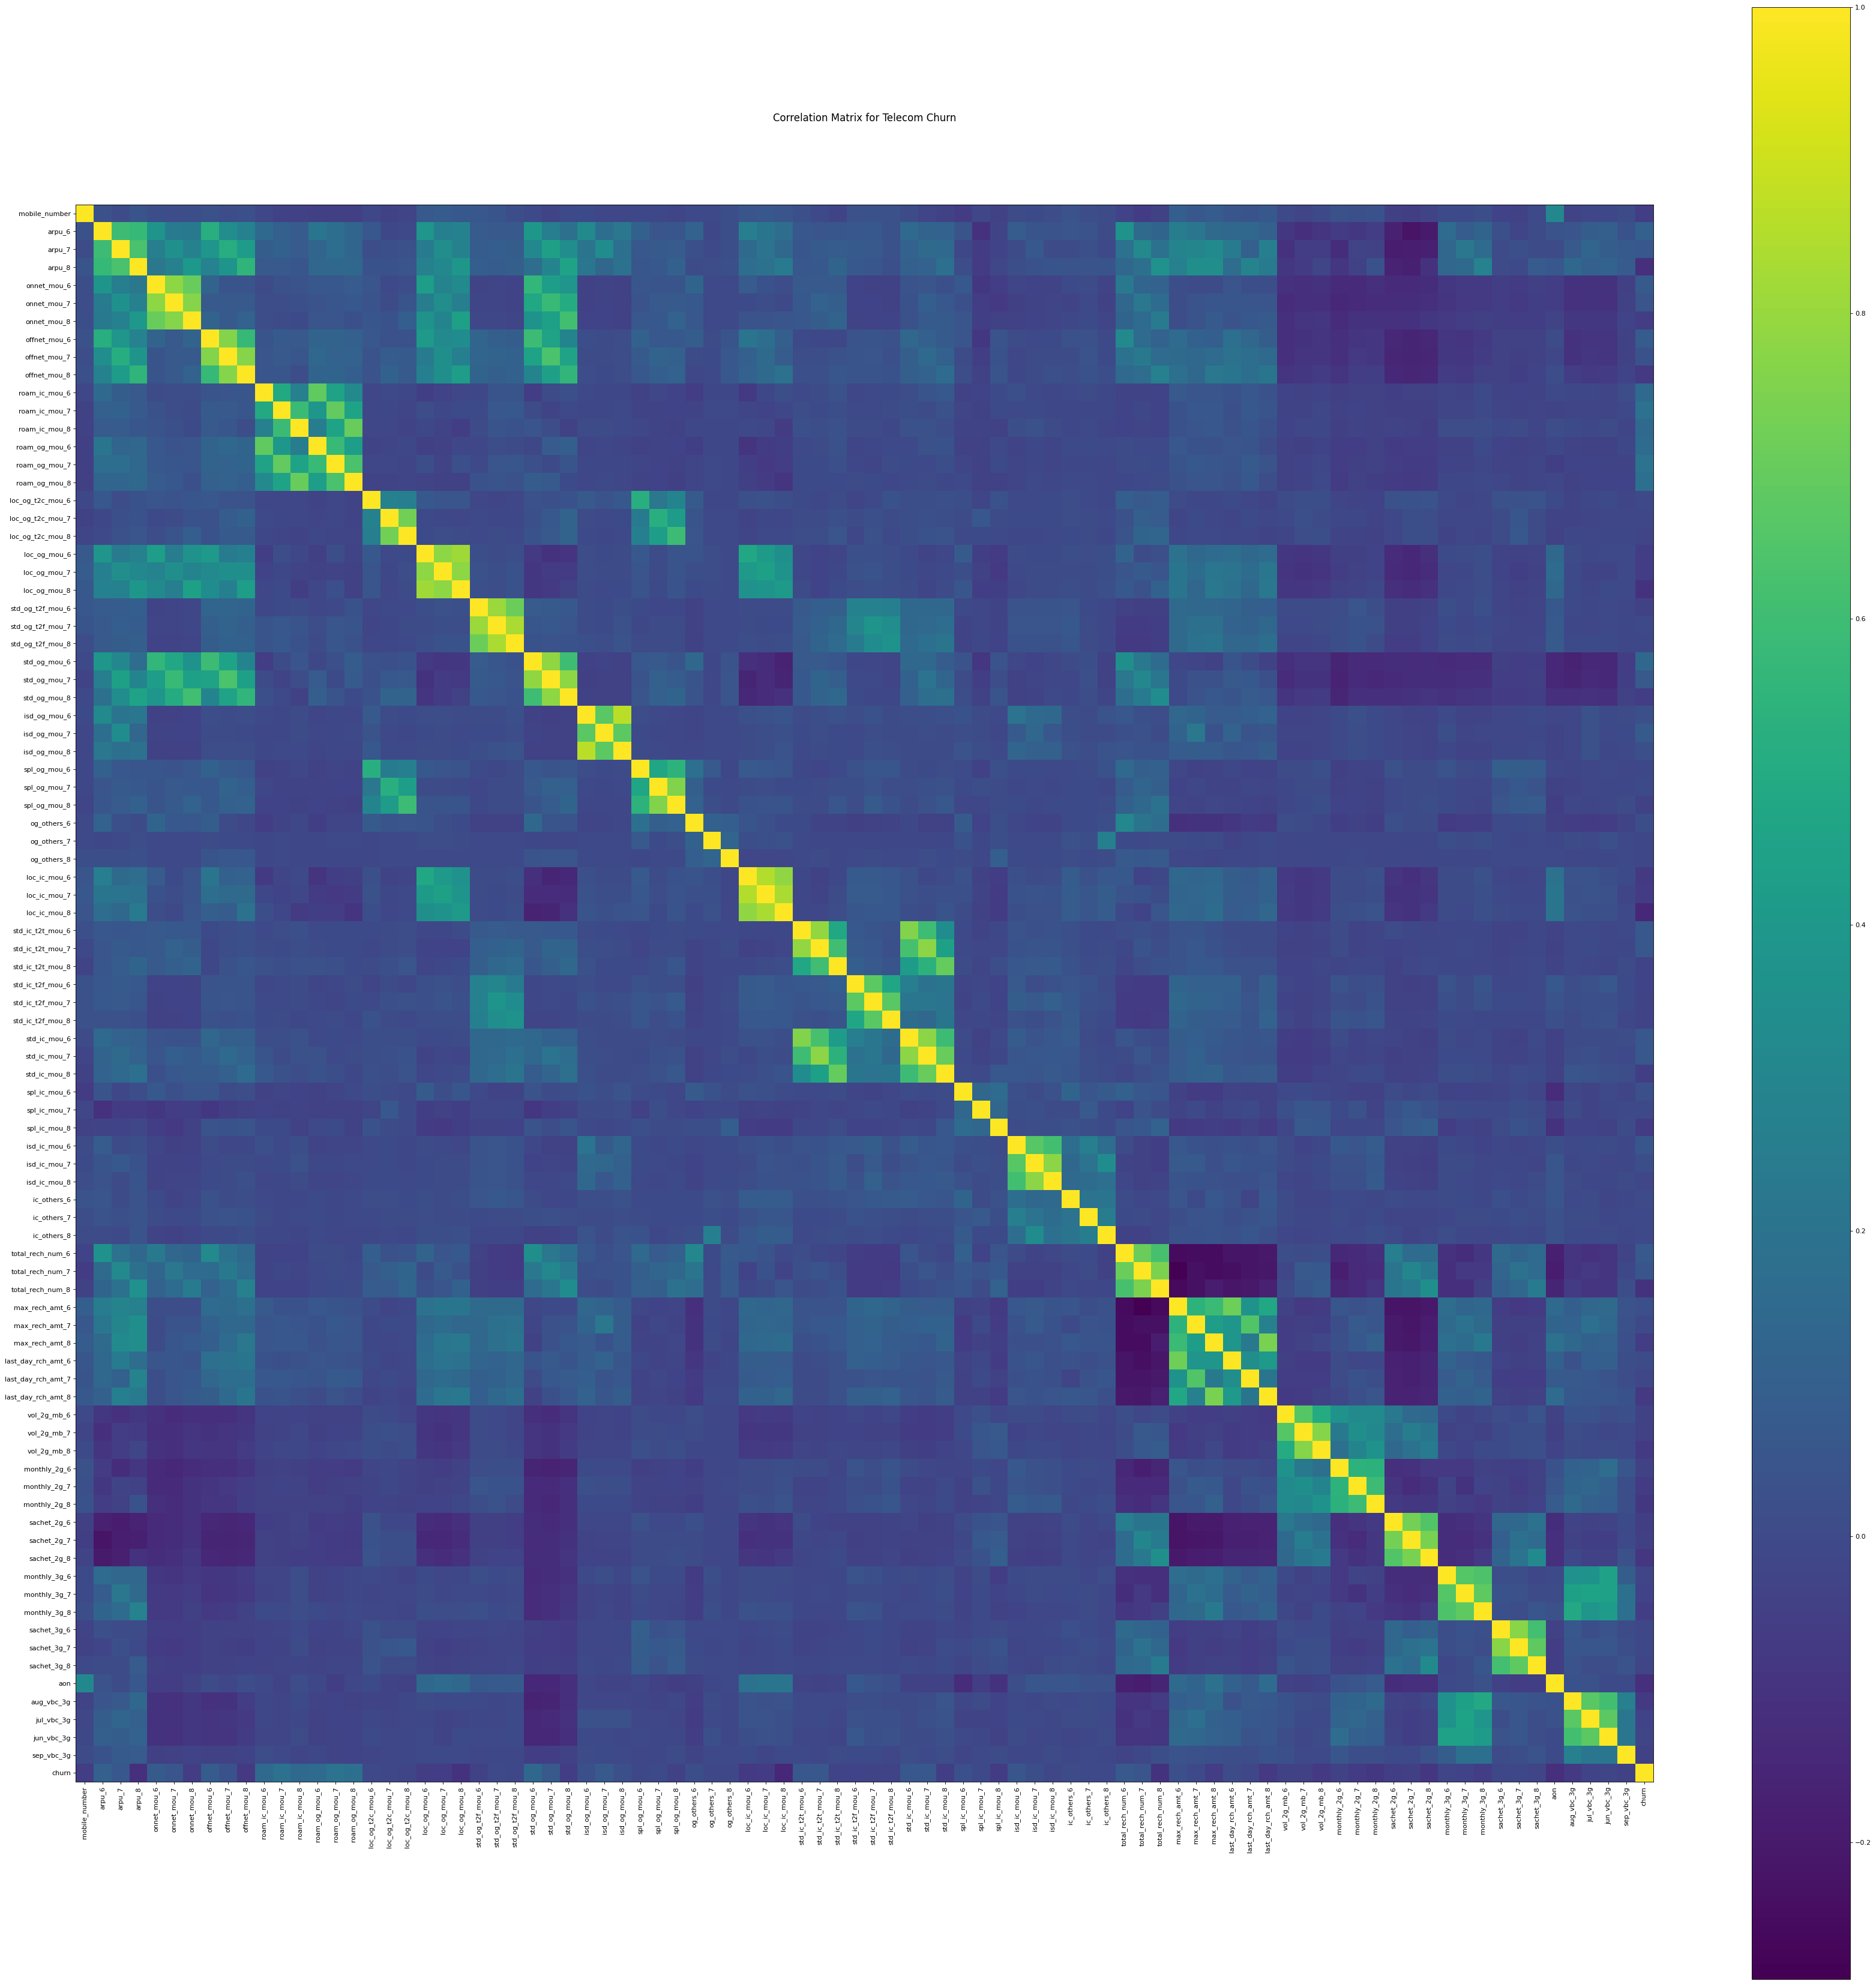

In [27]:
plotCorrelationMatrix(df_high_value_cust, 53)

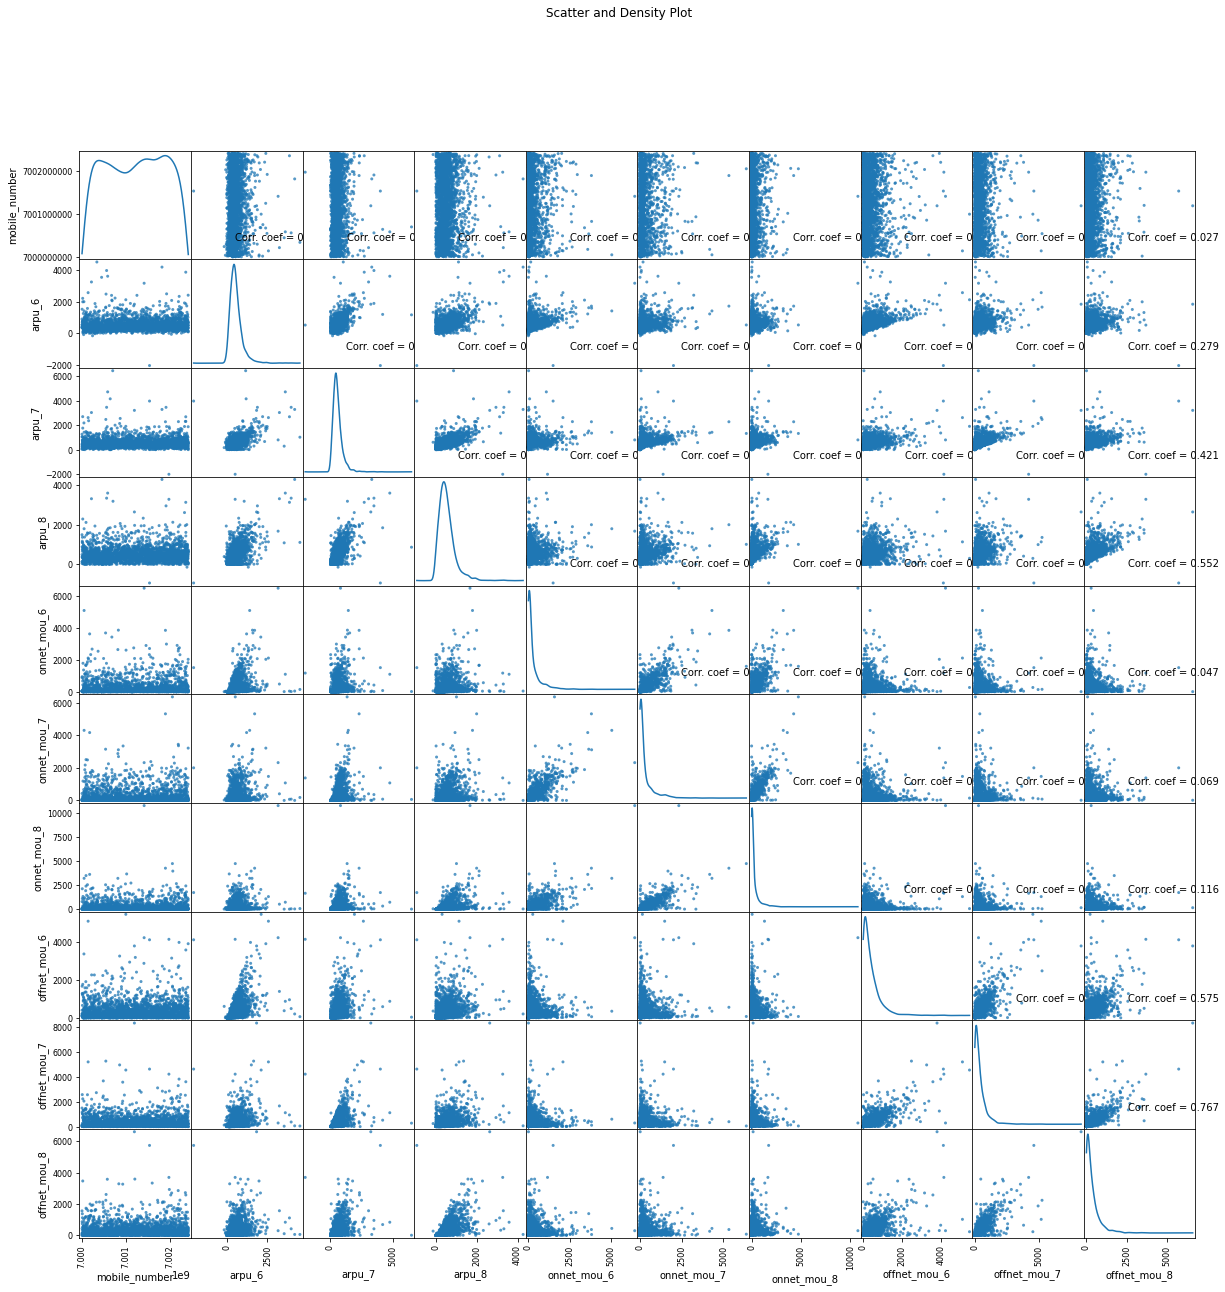

In [28]:
plotScatterMatrix(df_high_value_cust, 20, 10)

# Derive some new feautres from the existing columns

In [29]:
# lets first create list of columns belonging to 6th and 7th months
col_list = df_high_value_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_high_value_cust.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_high_value_cust[avg_col_name] = (df_high_value_cust[col_6]  + df_high_value_cust[col_7])/ 2

(2268, 88)


In [30]:
# we dont need columns from which we have derived new features, we will drop those columns
print ("Dataset after creating dervied features:",df_high_value_cust.shape)
col_to_drop = df_high_value_cust.filter(regex='_6|_7').columns
df_high_value_cust.drop(col_to_drop, axis=1, inplace=True)

print(" Dataset after dropping un-necessary columns:",df_high_value_cust.shape)

Dataset after creating dervied features: (2268, 115)
 Dataset after dropping un-necessary columns: (2268, 61)


In [31]:
# lets now conevrt AON in months
df_high_value_cust['aon_mon'] = df_high_value_cust['aon']/30
df_high_value_cust.drop('aon', axis=1, inplace=True)
df_high_value_cust['aon_mon'].head()

7     26.733333
8     10.500000
21    24.000000
23    20.133333
33    44.266667
Name: aon_mon, dtype: float64

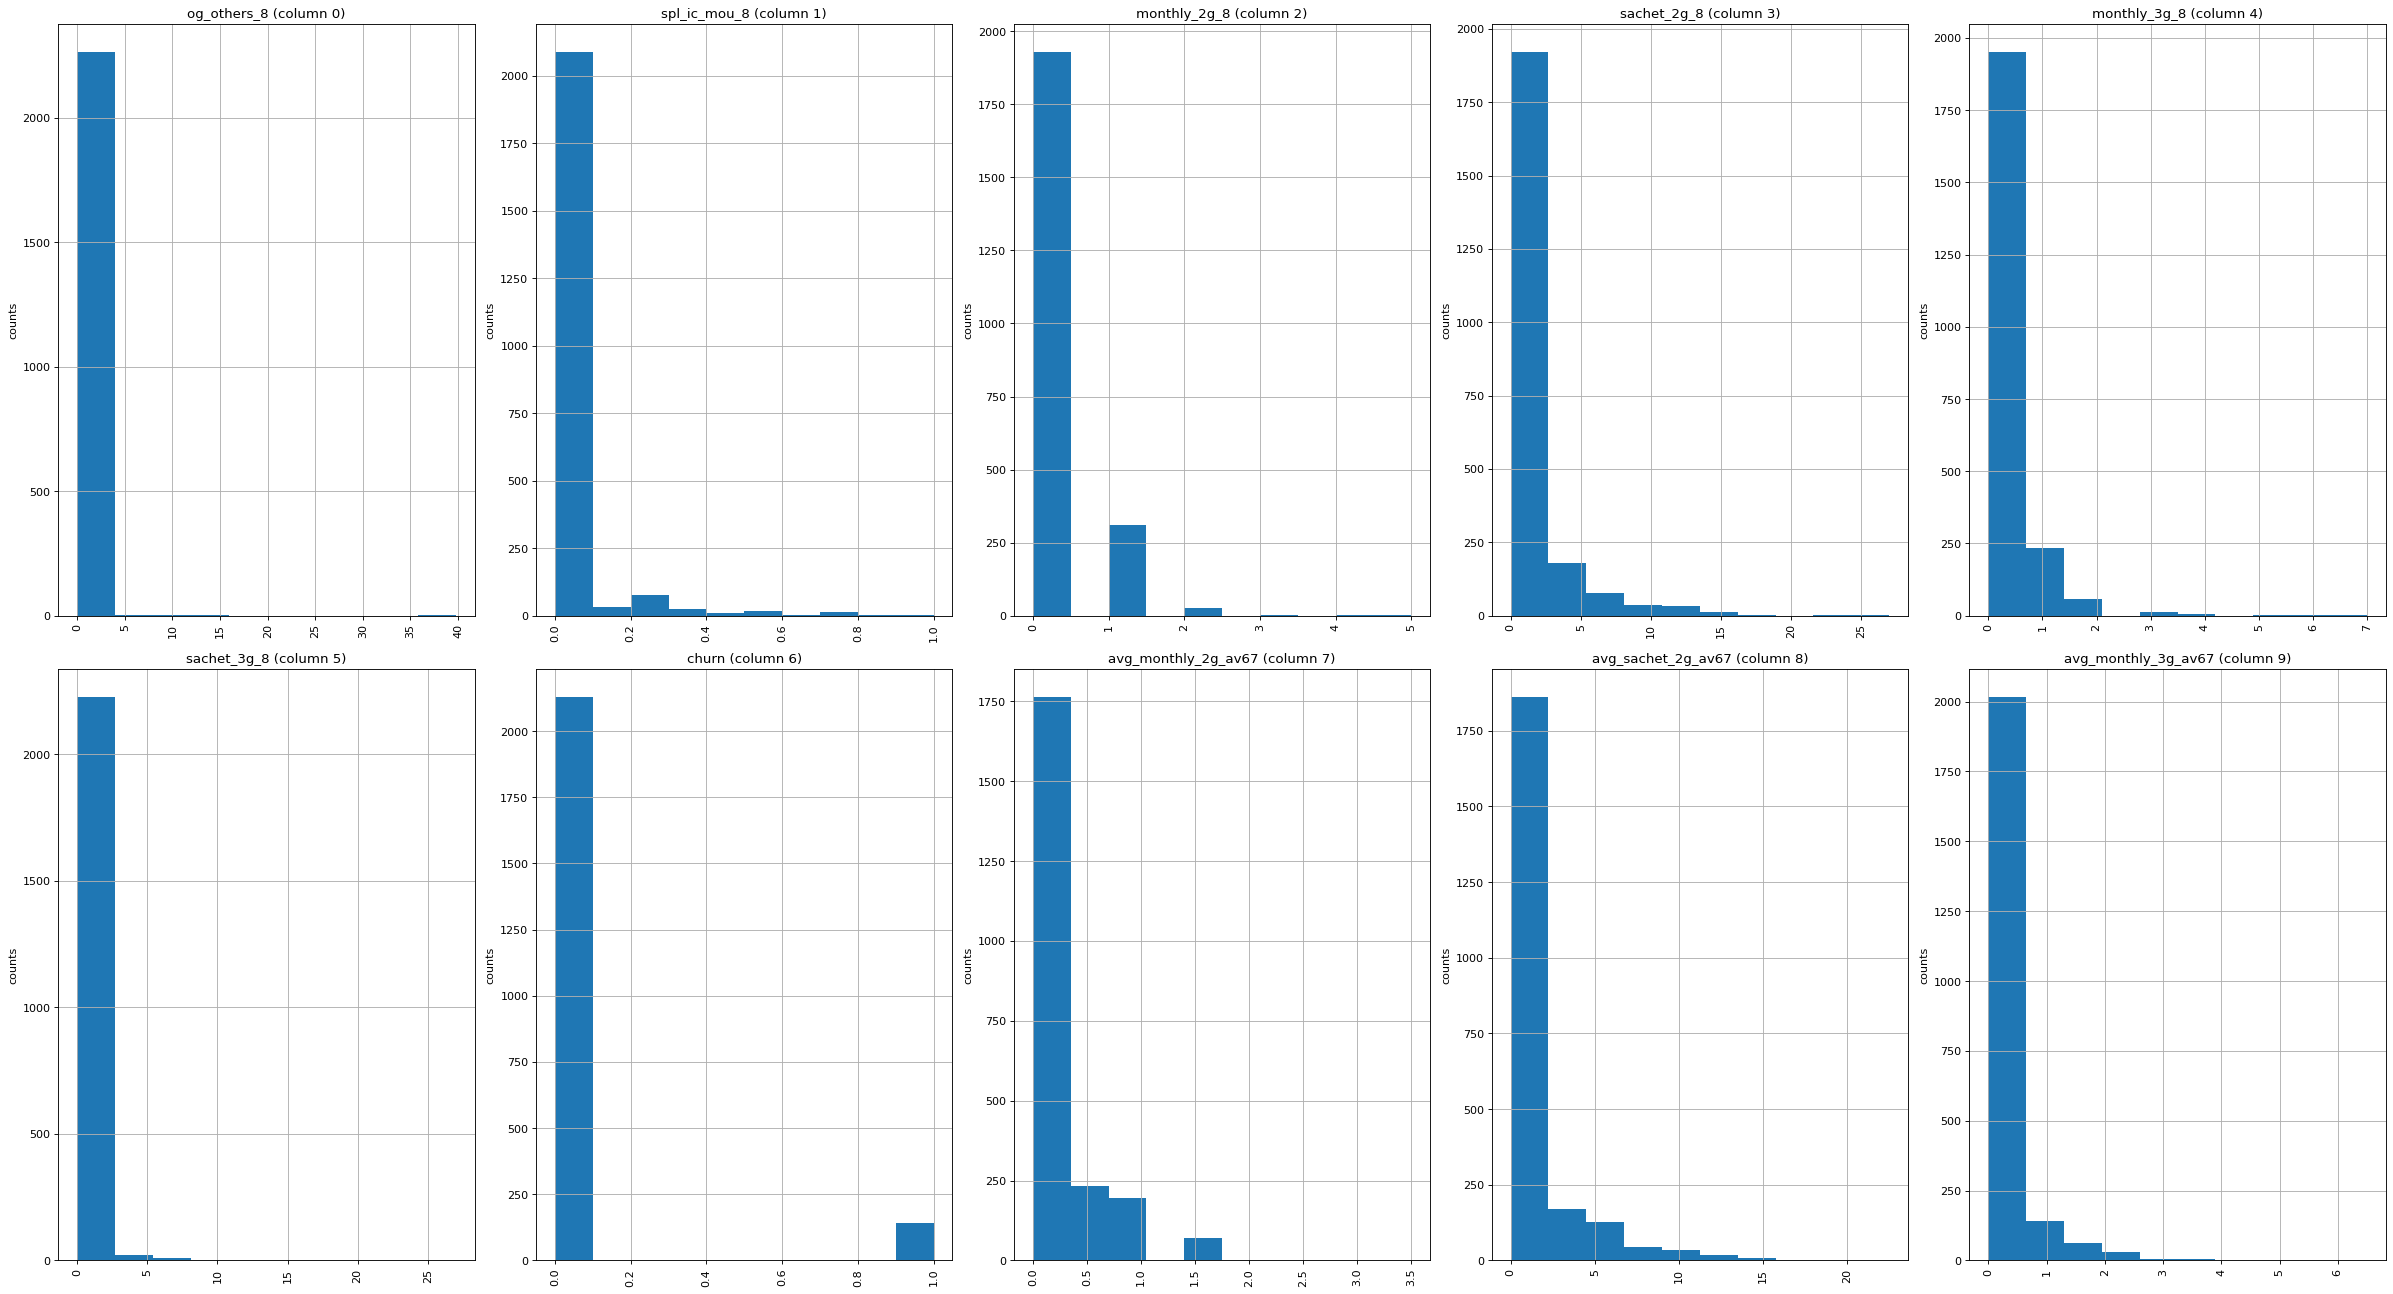

In [32]:
# lets again draw the plots with the updated dataset
plotPerColumnDistribution(df_high_value_cust, 10, 5)

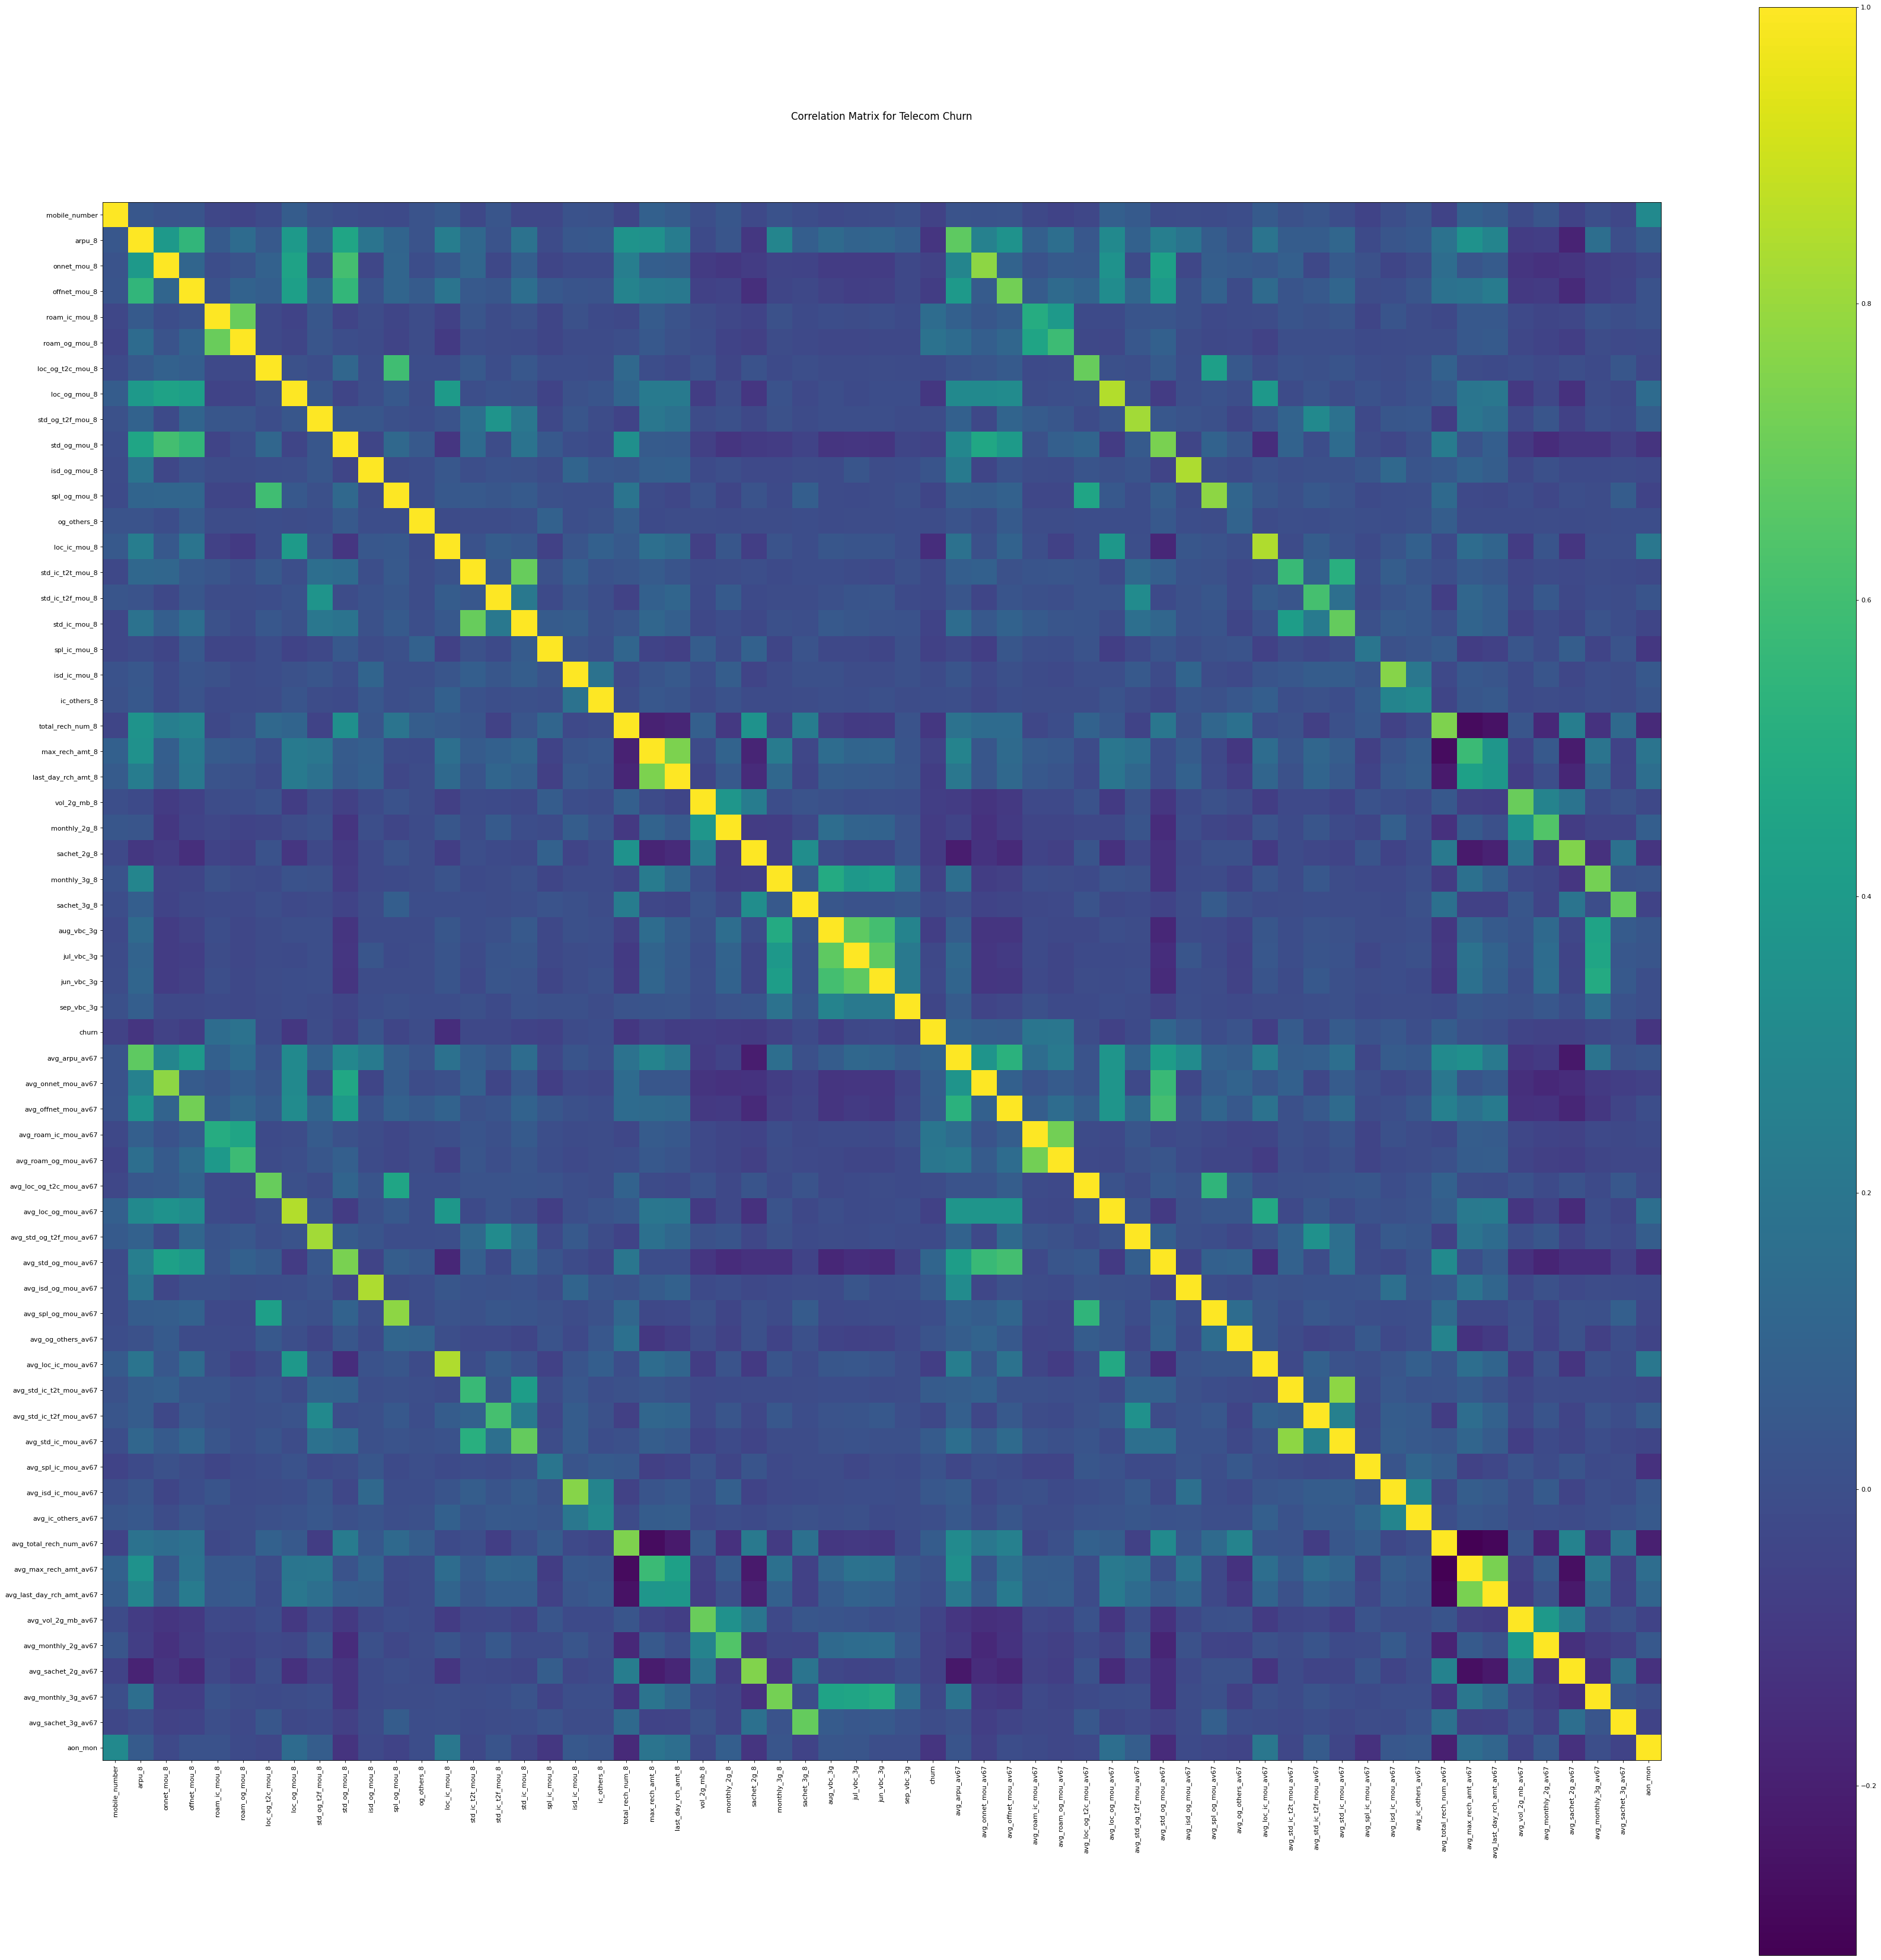

In [33]:
plotCorrelationMatrix(df_high_value_cust, 53)

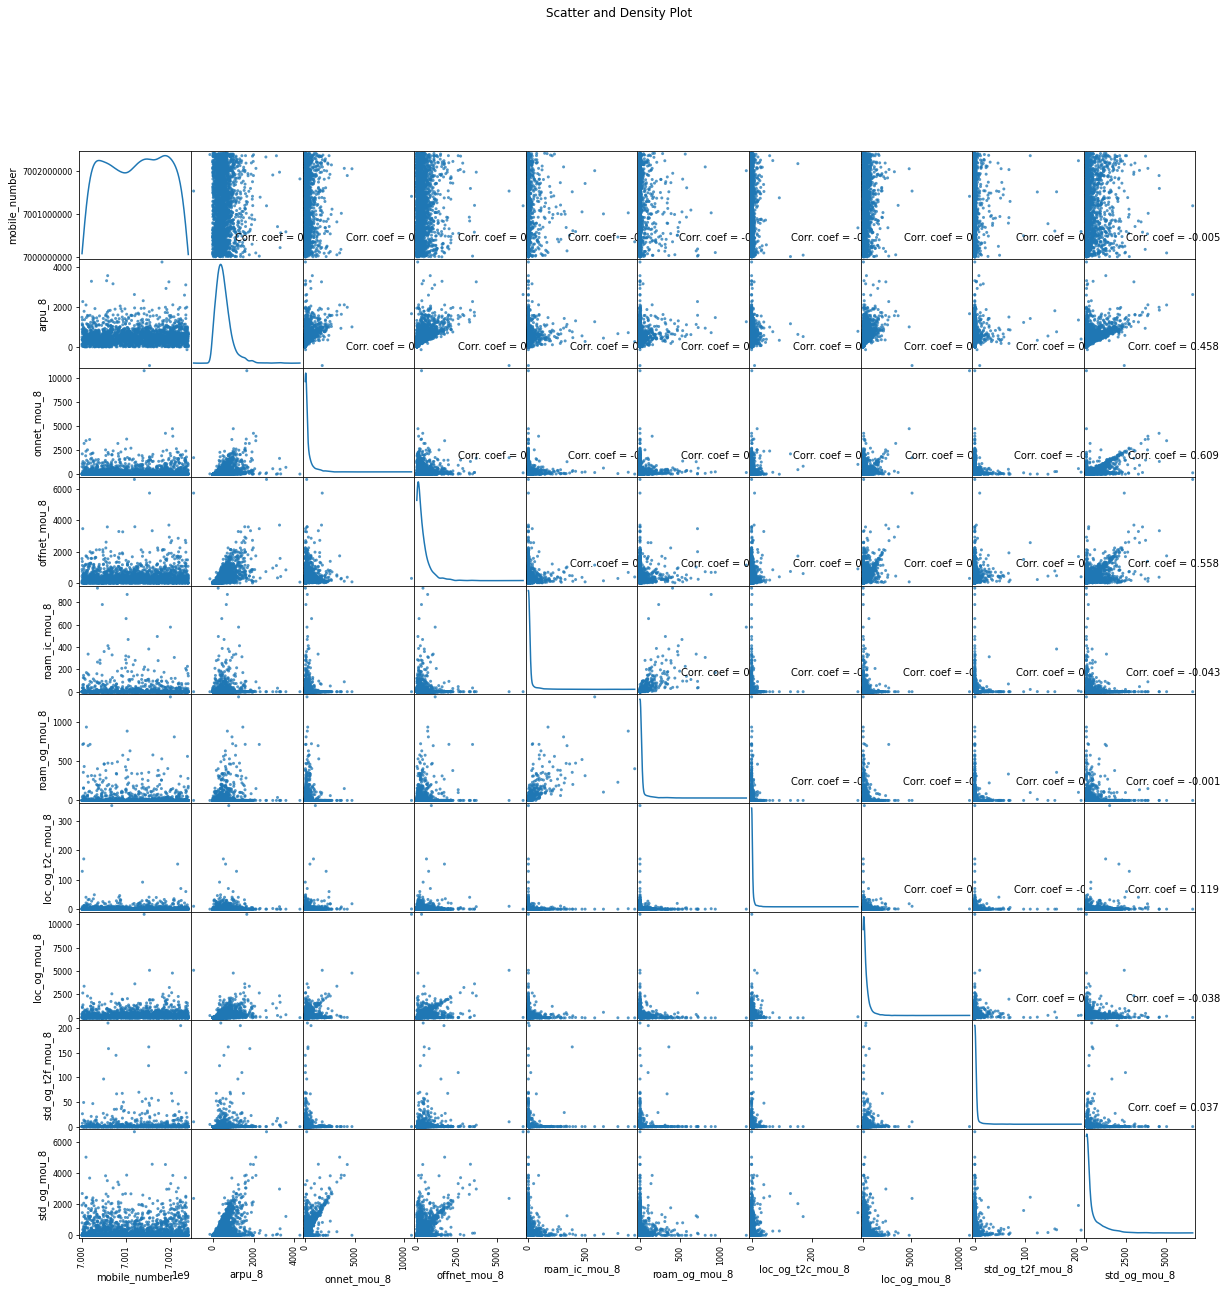

In [34]:
plotScatterMatrix(df_high_value_cust, 20, 10)

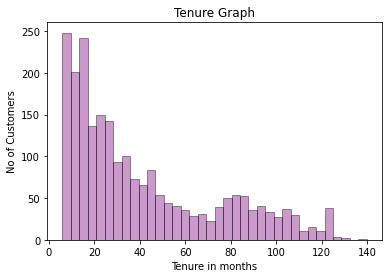

In [35]:
ax = sns.distplot(df_high_value_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Tenure Graph')
plt.show()
# below graph simply shows the tenure of the customers

In [36]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_high_value_cust['tenure_range'] = pd.cut(df_high_value_cust['aon_mon'], tn_range, labels=tn_label)
df_high_value_cust['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
33        2-5 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

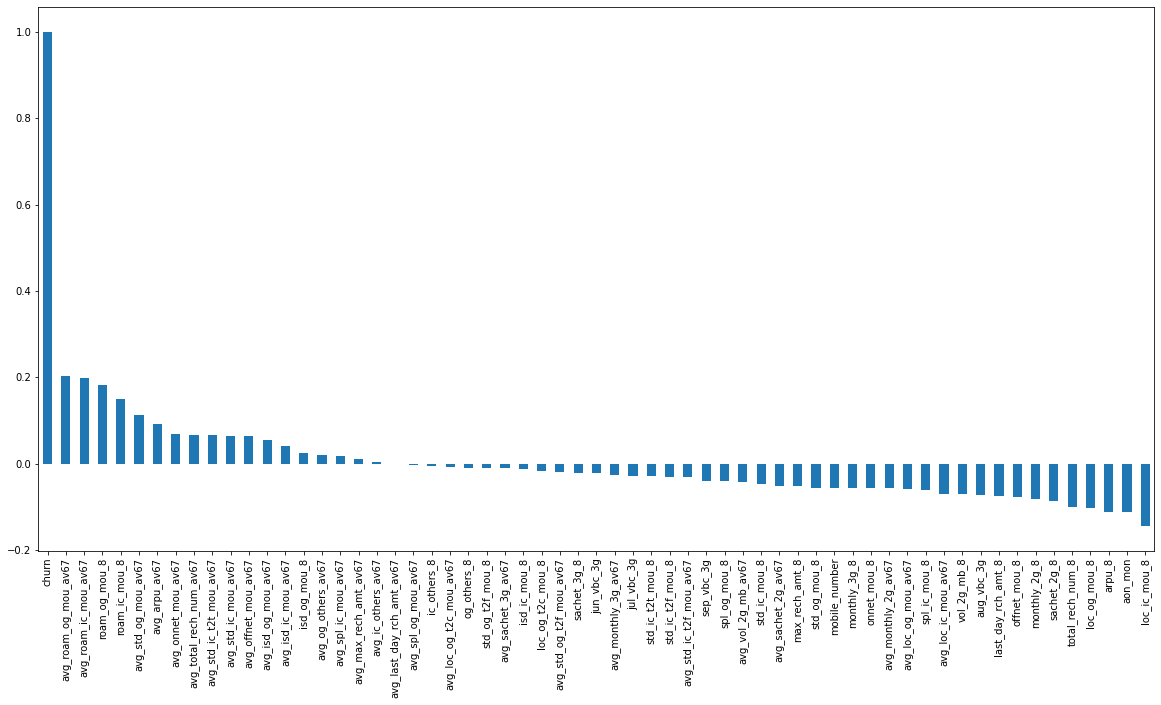

In [37]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
df_high_value_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

# observations : 
# 1. Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. 
# 2. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

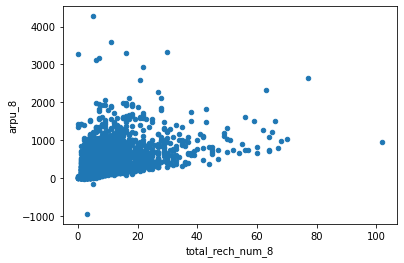

In [38]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
df_high_value_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')
plt.show()

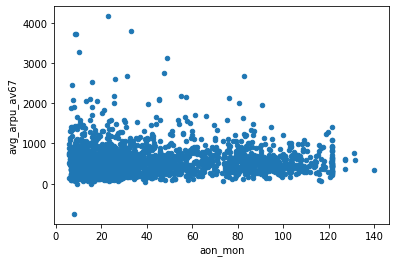

In [39]:
# plot between tenure and revenue
df_high_value_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')
plt.show()

# Churn Vs other important features¶

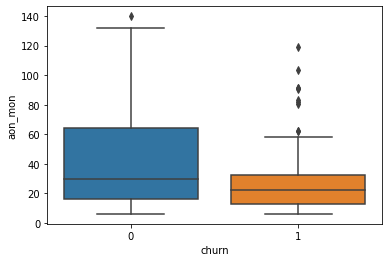

In [40]:
sns.boxplot(x = df_high_value_cust.churn, y = df_high_value_cust.aon_mon)
plt.show()

# from the below plot , its clear tenured customers do no churn and they keep availing telecom services

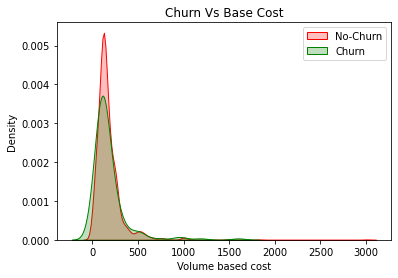

In [41]:
# churn Vs Base Cost
ax = sns.kdeplot(df_high_value_cust.avg_max_rech_amt_av67[(df_high_value_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value_cust.avg_max_rech_amt_av67[(df_high_value_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')
plt.show()

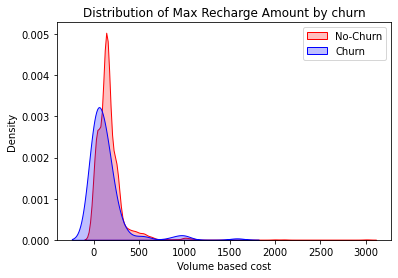

In [42]:
# churn vs max rechare amount
ax = sns.kdeplot(df_high_value_cust.max_rech_amt_8[(df_high_value_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value_cust.max_rech_amt_8[(df_high_value_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

In [43]:
# we will create a new dataset for model building
df1 = df_high_value_cust[:].copy()

# lets drop tenure range because it is highly correlated with AON MONTH column
df1.drop('tenure_range', axis=1, inplace=True)
df1.drop('mobile_number', axis=1, inplace=True)
df1.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,aon_mon
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7.0,1580.0,779.0,0.00,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.0,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14.0,30.0,10.0,0.03,0.0,3.0,0.0,0.0,21.03,910.65,122.16,0.0,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27.0,50.0,50.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4.0,179.0,0.0,0.01,0.0,0.0,1.0,1.0,40.45,51.86,0.00,0.0,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,20.133333
33,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1.0,455.0,455.0,7.97,0.0,0.0,1.0,0.0,358.10,2706.83,1714.67,0.0,0,1669.9265,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,2.180,1.455,0.595,4.420,0.000,0.000,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,44.266667


In [44]:
# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"
X = df1.drop(['churn'], axis=1)
y = df1['churn']

df1.drop('churn', axis=1, inplace=True)

# Scaling & train-test Split

In [45]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [46]:
# split the dateset into train-test dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (1587, 59)
Dimension of X_test: (681, 59)


In [48]:
# As discussed earlier, given dataset is skewed, lets balance the dataset
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)



In [50]:
print("X_tr Shape:", X_tr.shape)
print("y_tr Shape:", y_tr.shape)

print("Imbalance in Training dataset:",(y_tr != 0).sum()/(y_tr == 0).sum())

X_tr Shape: (2980, 59)
y_tr Shape: (2980,)
Imbalance in Training dataset: 1.0


# Model Building

In [55]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9493392070484582

# RFE

SVM gave an accuracy of 94%

In [58]:
# we will now using RFE for feature reduction
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.feature_selection import RFE

# lets RFE select 15 most imp features for us
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_tr, y_tr)


In [60]:
rfe_features = list(df1.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['loc_og_t2c_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'avg_std_og_mou_av67', 'avg_loc_ic_mou_av67', 'avg_std_ic_t2t_mou_av67']


In [61]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [62]:
# lets create a Logisctic Regression model on the seleted columns by RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[342  91]
 [  4  17]]
Accuracy on the test dataset: 0.7907488986784141


In [64]:
# lets check classification report on the test dataset
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       433
           1       0.16      0.81      0.26        21

    accuracy                           0.79       454
   macro avg       0.57      0.80      0.57       454
weighted avg       0.95      0.79      0.85       454



Conclusion from the above model:

Model Accuracy is approx 79% Confusion matix shows high false positive rate, which is not good, lets try PCA now.

# PCA

In [67]:
# PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to correct class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(2980, 59)
(2980,)


In [68]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

# apply PCA on train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [69]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(2980, 59)
(681, 59)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[563  75]
 [ 13  30]]
Accuracy of the logistic regression model with PCA:  0.8707782672540382


In [73]:
col = list(df1.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC-1,PC-2,PC-3,Feature
0,0.111152,0.340941,0.061208,arpu_8
1,0.026144,0.111946,0.203892,onnet_mou_8
2,0.042755,0.198607,0.156712,offnet_mou_8
3,0.260064,-0.091425,-0.015249,roam_ic_mou_8
4,0.363099,-0.106934,0.040353,roam_og_mou_8
5,-0.014898,0.032423,0.094620,loc_og_t2c_mou_8
6,0.003714,0.196672,0.050701,loc_og_mou_8
7,0.078255,0.129783,-0.041231,std_og_t2f_mou_8
8,0.005687,0.115248,0.255286,std_og_mou_8
9,0.004717,0.128150,-0.064163,isd_og_mou_8


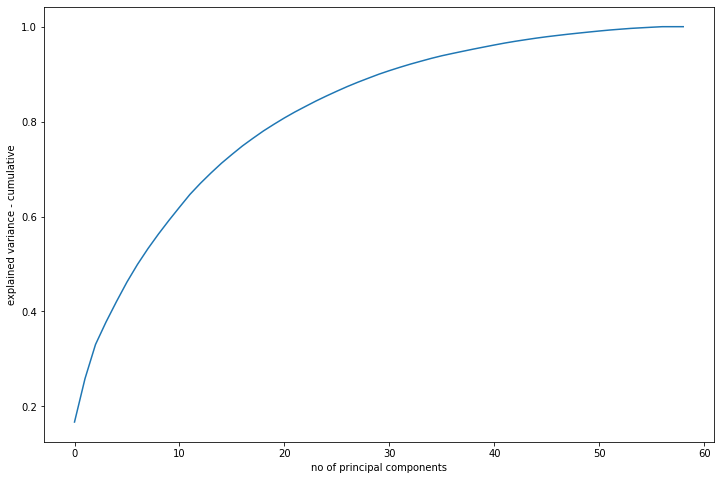

In [74]:
# scree plot to check the variance explained by different PCAs
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [75]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
# 33 columns explains 90% of the variance, lets apply PCA with 33 components

array([ 16.7 ,  25.85,  33.04,  37.77,  42.1 ,  46.22,  49.92,  53.25,
        56.32,  59.21,  61.97,  64.68,  67.02,  69.19,  71.24,  73.1 ,
        74.89,  76.5 ,  78.05,  79.45,  80.79,  82.04,  83.2 ,  84.34,
        85.4 ,  86.42,  87.4 ,  88.31,  89.16,  90.  ,  90.75,  91.45,
        92.12,  92.73,  93.33,  93.88,  94.36,  94.82,  95.28,  95.72,
        96.15,  96.56,  96.93,  97.27,  97.6 ,  97.9 ,  98.17,  98.43,
        98.66,  98.89,  99.11,  99.32,  99.49,  99.66,  99.79,  99.91,
       100.02, 100.02, 100.02])

In [76]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_tr)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(2980, 33)
(681, 33)


In [77]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_33, y_tr)

# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.8458149779735683


In [78]:
print(confusion_matrix(y_test,y_pred33))

[[543  95]
 [ 10  33]]


In [79]:
#Conclusions from the above model:

#Model has 80% Accuracy 33 features can explain 90% variance in the dataset most imp features: arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

In [80]:
#Decision Tree

In [81]:
# lets create a decision tree now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# apply SMOTE to tackle class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(2980, 59)
(2980,)


In [82]:
# feature selection using lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_tr)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(2980, 8)
[ 0  4 12 19 34 35 39 58]


In [84]:
# feature vector for decision tree
lasso_features = list(df1.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'total_rech_num_8', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'aon_mon']


In [85]:
# import decision tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
# lets see the classification reort of the model built
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       638
           1       0.24      0.49      0.32        43

    accuracy                           0.87       681
   macro avg       0.60      0.69      0.63       681
weighted avg       0.92      0.87      0.89       681



In [87]:
# confusion matrix
print(confusion_matrix(y_test,y_pred1))
# accuracy of the decision tree
print('Decision Tree - Accuracy :',accuracy_score(y_test,y_pred1))

[[572  66]
 [ 22  21]]
Decision Tree - Accuracy : 0.8707782672540382


In [88]:
#Lets fine tune hyperparameters¶

In [89]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

In [90]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002666,0.000162,0.000383,0.000067,1,{'max_depth': 1},0.780201,0.808725,0.840604,0.852349,0.833893,0.823154,0.025789,39,0.833893,0.827181,0.819211,0.816275,0.820889,0.823490,0.006308
1,0.004370,0.000352,0.000451,0.000107,2,{'max_depth': 2},0.786913,0.813758,0.845638,0.850671,0.838926,0.827181,0.023799,38,0.848574,0.843960,0.838926,0.832215,0.840604,0.840856,0.005434
2,0.005774,0.000061,0.000446,0.000025,3,{'max_depth': 3},0.827181,0.848993,0.887584,0.890940,0.869128,0.864765,0.024026,37,0.881711,0.864933,0.865772,0.860319,0.870805,0.868708,0.007304
3,0.007519,0.000611,0.000519,0.000102,4,{'max_depth': 4},0.840604,0.848993,0.904362,0.895973,0.870805,0.872148,0.025053,36,0.897232,0.880034,0.880872,0.876258,0.881292,0.883138,0.007268
4,0.008888,0.001008,0.000513,0.000051,5,{'max_depth': 5},0.845638,0.877517,0.874161,0.901007,0.864094,0.872483,0.018071,35,0.901007,0.894715,0.891359,0.890101,0.893037,0.894044,0.003813


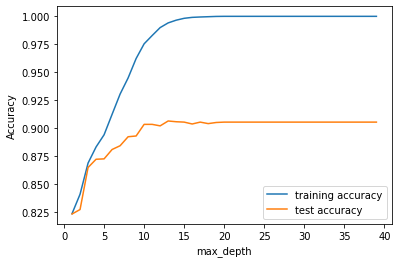

In [91]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# max_depth =10 seems to be the optimal one

In [92]:
# lets find optimal value of minimum sample leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [93]:
# grid search results
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013796,0.000455,0.000590,0.000043,5,{'min_samples_leaf': 5},0.874161,0.875839,0.909396,0.894295,0.879195,0.886577,0.013448,1,0.956376,0.949245,0.951762,0.947987,0.952601,0.951594,0.002913
1,0.010835,0.000656,0.000512,0.000037,25,{'min_samples_leaf': 25},0.820470,0.865772,0.869128,0.879195,0.872483,0.861409,0.020946,2,0.895973,0.892198,0.888842,0.885906,0.891359,0.890856,0.003370
2,0.009787,0.000294,0.000810,0.000528,45,{'min_samples_leaf': 45},0.802013,0.850671,0.879195,0.887584,0.872483,0.858389,0.030730,4,0.879614,0.877517,0.871225,0.869128,0.872903,0.874077,0.003912
3,0.008998,0.000331,0.000522,0.000051,65,{'min_samples_leaf': 65},0.812081,0.850671,0.882550,0.885906,0.870805,0.860403,0.027125,3,0.879195,0.871225,0.864513,0.860738,0.870386,0.869211,0.006308
4,0.008342,0.000217,0.000469,0.000028,85,{'min_samples_leaf': 85},0.822148,0.828859,0.879195,0.880872,0.869128,0.856040,0.025344,5,0.875419,0.861158,0.861997,0.856124,0.864513,0.863842,0.006398


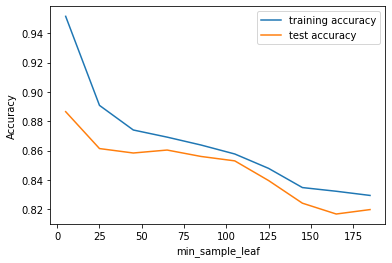

In [94]:
# plotting accuracies with min_sample_leaf
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_sample_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_sample_leaf =25 seems to be the optimal one

In [95]:
# lets fine tune min sample split now
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015774,0.001261,0.000558,0.000066,5,{'min_samples_split': 5},0.882550,0.901007,0.911074,0.911074,0.890940,0.899329,0.011230,1,0.988674,0.988674,0.990352,0.987416,0.990352,0.989094,0.001126
1,0.015181,0.001286,0.000524,0.000040,25,{'min_samples_split': 25},0.859060,0.887584,0.897651,0.916107,0.860738,0.884228,0.021877,2,0.953859,0.946309,0.943792,0.945470,0.951342,0.948154,0.003804
2,0.014047,0.000319,0.000544,0.000032,45,{'min_samples_split': 45},0.848993,0.884228,0.889262,0.894295,0.855705,0.874497,0.018484,3,0.923658,0.932466,0.922819,0.916527,0.924077,0.923909,0.005079
3,0.013813,0.000574,0.000555,0.000028,65,{'min_samples_split': 65},0.838926,0.880872,0.879195,0.880872,0.869128,0.869799,0.016044,6,0.918624,0.913591,0.906879,0.906040,0.902265,0.909480,0.005851
4,0.013437,0.000521,0.000503,0.000035,85,{'min_samples_split': 85},0.825503,0.880872,0.884228,0.894295,0.875839,0.872148,0.024091,4,0.906040,0.904362,0.890520,0.892198,0.895973,0.897819,0.006304


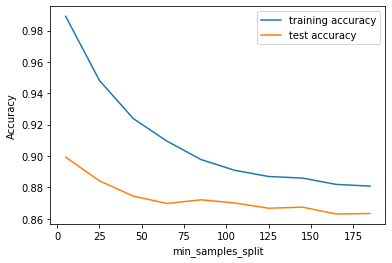

In [97]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# min_samples_leaf=50 seems to be optimal

In [98]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [99]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8677852348993289


In [100]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [101]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [102]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8766519823788547


Conclusion from the above Decision Tree model
1. 85% accuracy on the test dataset
2. lots of false positives in the confusion matrix

Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9162995594713657


In [106]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       638
           1       0.37      0.47      0.41        43

    accuracy                           0.92       681
   macro avg       0.67      0.71      0.68       681
weighted avg       0.93      0.92      0.92       681



In [107]:
# Printing confusion matrix
print(confusion_matrix(y_test, prediction_test))

[[604  34]
 [ 23  20]]


In [108]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [109]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.212333,0.007465,0.011550,0.000624,2,{'max_depth': 2},0.832215,0.830537,0.890940,0.875839,0.864094,0.858725,0.023903,4,0.870805,0.861997,0.859060,0.856963,0.860738,0.861913,0.004756
1,0.312984,0.004736,0.014966,0.002112,7,{'max_depth': 7},0.870805,0.885906,0.921141,0.911074,0.901007,0.897987,0.017896,3,0.931208,0.930369,0.923238,0.922819,0.926174,0.926762,0.003495
2,0.375957,0.017323,0.015642,0.000079,12,{'max_depth': 12},0.902685,0.914430,0.944631,0.944631,0.932886,0.927852,0.016745,2,0.996644,0.996644,0.996225,0.996225,0.997903,0.996728,0.000616
3,0.410281,0.005648,0.016307,0.000532,17,{'max_depth': 17},0.914430,0.926174,0.951342,0.947987,0.934564,0.934899,0.013689,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


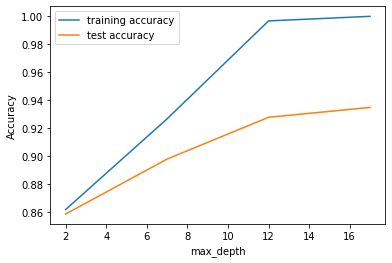

In [110]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
##Tuning n_estimators
## GridSearchCV to find optimal n_estimators
#from sklearn.model_selection import KFold
## specify number of folds for k-fold CV
n_folds = 5
#
## parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
#
## instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)
#
#
## fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

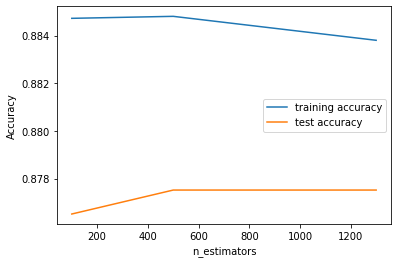

In [126]:
## scores of GridSearch CV
scores = rf.cv_results_
#
## plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [127]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

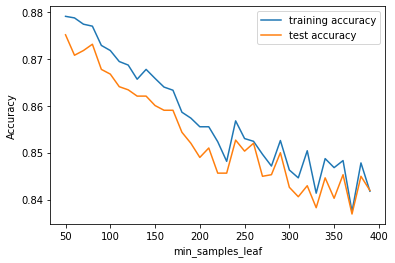

In [128]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [129]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

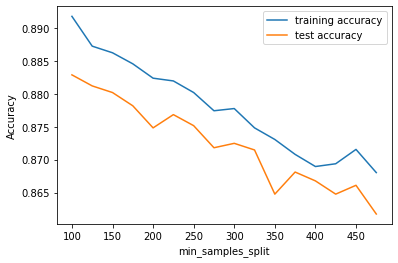

In [130]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

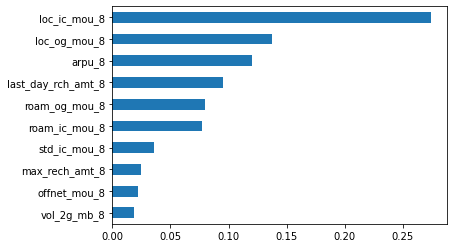

In [152]:
# list of important features
X = df1
features = X.columns.values
X = pd.DataFrame(scaler.transform(X))
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

Conclusions from Random Forest¶
Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

# Overall Conclusions
- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn.
- Local Incoming and Outgoing Calls for 8th Month and avg revenue in 8th Month are the most important columns to predict churn.
- cutomers with tenure less than 4 yrs are more likely to churn.
- Max Recharge Amount is a strong feature to predict churn.
- Random Forest produced the best prediction results followed by SVM.